# Importing Libraries

In [20]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes_data_upload.csv')

In [3]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# Preprocessing

In [5]:
{column: len(data[column].unique()) for column in data.columns}

{'Age': 51,
 'Gender': 2,
 'Polyuria': 2,
 'Polydipsia': 2,
 'sudden weight loss': 2,
 'weakness': 2,
 'Polyphagia': 2,
 'Genital thrush': 2,
 'visual blurring': 2,
 'Itching': 2,
 'Irritability': 2,
 'delayed healing': 2,
 'partial paresis': 2,
 'muscle stiffness': 2,
 'Alopecia': 2,
 'Obesity': 2,
 'class': 2}

In [6]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

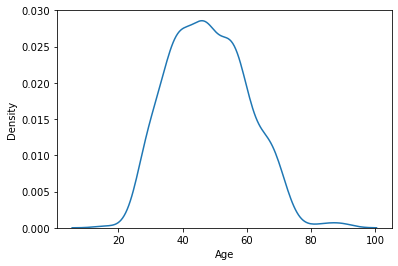

In [52]:
sns.kdeplot(x = 'Age', data = data)

# Train-Test Split

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    # Binary encode Gender column
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    
    # Binary encode symptom columns
    for column in df.columns.drop(['Age', 'Gender', 'class']):
        df[column] = df[column].replace({'Yes': 0, 'No': 1})
    #Split df into X and y
    y = df['class']
    X = df.drop('class', axis=1)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, shuffle=True, random_state=1)
    X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle=True, random_state=1)
    
    #Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, X_val, y_train, y_test,y_val

In [9]:
X_train, X_test, X_val, y_train, y_test, y_val = preprocess_inputs(data)

In [10]:
X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
201,-1.657346,0.766672,1.0,0.886232,-1.196975,1.202938,0.903656,0.558841,0.869065,0.957628,0.581051,0.930307,0.877618,0.739235,0.739235,0.445923
92,-0.657531,-1.304338,-1.0,-1.128372,-1.196975,-0.831298,0.903656,0.558841,-1.150662,0.957628,0.581051,-1.074914,-1.139448,-1.352750,0.739235,0.445923
344,1.092146,-1.304338,-1.0,0.886232,0.835440,1.202938,-1.106616,0.558841,0.869065,0.957628,-1.721019,0.930307,0.877618,0.739235,-1.352750,0.445923
119,-1.157438,-1.304338,-1.0,-1.128372,0.835440,-0.831298,0.903656,0.558841,0.869065,0.957628,-1.721019,0.930307,0.877618,-1.352750,0.739235,0.445923
221,-0.407577,0.766672,1.0,0.886232,0.835440,-0.831298,0.903656,-1.789419,0.869065,-1.044247,0.581051,-1.074914,0.877618,0.739235,-1.352750,0.445923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.009013,0.766672,-1.0,-1.128372,-1.196975,-0.831298,0.903656,0.558841,0.869065,-1.044247,0.581051,0.930307,-1.139448,0.739235,-1.352750,0.445923
144,1.675372,0.766672,-1.0,-1.128372,0.835440,1.202938,-1.106616,0.558841,-1.150662,-1.044247,-1.721019,0.930307,-1.139448,0.739235,0.739235,0.445923
72,1.425418,-1.304338,1.0,0.886232,0.835440,1.202938,0.903656,-1.789419,0.869065,0.957628,0.581051,0.930307,0.877618,0.739235,0.739235,0.445923
235,-1.823982,0.766672,1.0,0.886232,0.835440,1.202938,0.903656,0.558841,0.869065,0.957628,0.581051,0.930307,0.877618,0.739235,0.739235,0.445923


In [11]:
X_train.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
count,4.160000e+02,4.160000e+02,416.000000,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02
mean,2.930348e-16,3.469447e-17,0.000000,-1.521219e-16,-1.505206e-16,-1.267683e-16,-1.216975e-16,1.120898e-17,1.323727e-16,1.014146e-17,-1.665335e-16,-2.898323e-16,-8.486801e-17,-2.215108e-16,-2.220446e-16,-3.298643e-16
std,1.001204e+00,1.001204e+00,1.001204,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00,1.001204e+00
min,-1.907300e+00,-1.304338e+00,-1.000000,-1.128372e+00,-1.196975e+00,-8.312983e-01,-1.106616e+00,-1.789419e+00,-1.150662e+00,-1.044247e+00,-1.721019e+00,-1.074914e+00,-1.139448e+00,-1.352750e+00,-1.352750e+00,-2.242540e+00
25%,-7.408487e-01,-1.304338e+00,-1.000000,-1.128372e+00,-1.196975e+00,-8.312983e-01,-1.106616e+00,5.588406e-01,-1.150662e+00,-1.044247e+00,-1.721019e+00,-1.074914e+00,-1.139448e+00,-1.352750e+00,-1.352750e+00,4.459229e-01
50%,-7.430519e-02,7.666722e-01,0.000000,8.862323e-01,8.354395e-01,-8.312983e-01,9.036558e-01,5.588406e-01,8.690652e-01,9.576276e-01,5.810513e-01,9.303069e-01,8.776177e-01,7.392350e-01,7.392350e-01,4.459229e-01
75%,6.755563e-01,7.666722e-01,1.000000,8.862323e-01,8.354395e-01,1.202938e+00,9.036558e-01,5.588406e-01,8.690652e-01,9.576276e-01,5.810513e-01,9.303069e-01,8.776177e-01,7.392350e-01,7.392350e-01,4.459229e-01
max,3.508366e+00,7.666722e-01,1.000000,8.862323e-01,8.354395e-01,1.202938e+00,9.036558e-01,5.588406e-01,8.690652e-01,9.576276e-01,5.810513e-01,9.303069e-01,8.776177e-01,7.392350e-01,7.392350e-01,4.459229e-01


In [14]:
print(f'Training Set : {X_train.shape[0]}')
print(f'Testing Set : {X_test.shape[0]} ')
print(f'Validation Set : {X_val.shape[0]} ')

Training Set : 416
Testing Set : 52 
Validation Set : 52 


# Training

In [17]:
models = {
                    "Logistic Regression": LogisticRegression(),
                    "K-Nearest Neighbors": KNeighborsClassifier(),
                         "Decision Treee": DecisionTreeClassifier(),
 "Support Vector Machine (Linear Kernel)": LinearSVC(),
   "Support Vector Machine (RBF Kernel)": SVC(),
                       "Neural Network": MLPClassifier(),
                       "Random Forest": RandomForestClassifier(),
                  "Gradient Boosting": GradientBoostingClassifier()

}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Treee trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.


C:\Users\88016\anaconda3\envs\new-project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [18]:
for name, model in models.items():
    print(name + ': {:.2f}%'.format(model.score(X_val, y_val)*100))

Logistic Regression: 38.46%
K-Nearest Neighbors: 61.54%
Decision Treee: 53.85%
Support Vector Machine (Linear Kernel): 38.46%
Support Vector Machine (RBF Kernel): 61.54%
Neural Network: 61.54%
Random Forest: 84.62%
Gradient Boosting: 76.92%


# Gradient Boosting Classifier

In [31]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred=gb_clf.predict(X_val)
print("Accuracy score: ",metrics.accuracy_score(y_val, y_pred))

Accuracy score:  0.8461538461538461


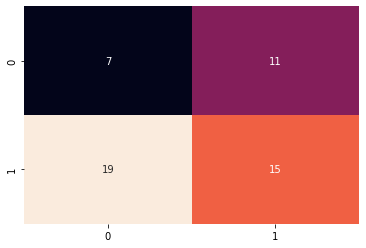

In [32]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

# Random Forest

In [28]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_val)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_val)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.8461538461538461


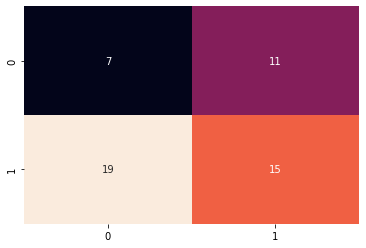

In [29]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

# SVM

In [33]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for validation dataset
y_pred = clf.predict(X_val)

In [41]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.38461538461538464


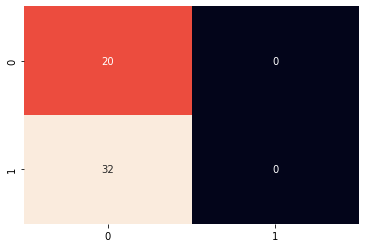

In [42]:
cm = confusion_matrix(y_val,y_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

# Manual Hyperparameter Tuning

In [53]:
### Manual Hyperparameter Tuning
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model=RandomForestClassifier(n_estimators=1000,criterion='gini',
                             max_features='log2',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_val)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_val,predictions))
print(classification_report(y_val,predictions))

[[ 7 11]
 [19 15]]
0.8461538461538461
              precision    recall  f1-score   support

    Negative       0.73      0.95      0.83        20
    Positive       0.96      0.78      0.86        32

    accuracy                           0.85        52
   macro avg       0.85      0.87      0.84        52
weighted avg       0.87      0.85      0.85        52



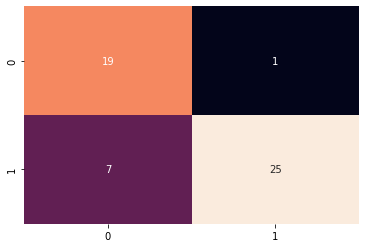

In [54]:
cm = confusion_matrix(y_val,predictions)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

In [44]:
### Manual Hyperparameter Tuning

model=RandomForestClassifier(n_estimators=900,criterion='gini',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_val)
print(confusion_matrix(y_val,predictions))
print(accuracy_score(y_val,predictions))
print(classification_report(y_val,predictions))

[[19  1]
 [ 7 25]]
0.8461538461538461
              precision    recall  f1-score   support

    Negative       0.73      0.95      0.83        20
    Positive       0.96      0.78      0.86        32

    accuracy                           0.85        52
   macro avg       0.85      0.87      0.84        52
weighted avg       0.87      0.85      0.85        52



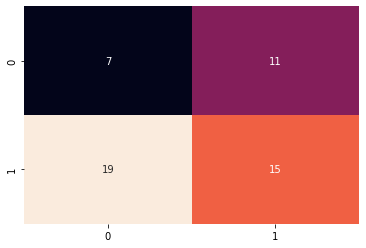

In [45]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

# Randomized Search CV

In [46]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [47]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [48]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [49]:
best_random_grid=rf_randomcv.best_estimator_

In [56]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
#print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[18  0]
 [ 0 34]]
Accuracy Score 1.0


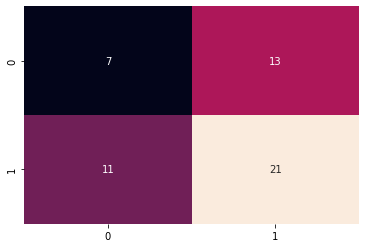

In [52]:
cm = confusion_matrix(y_val,y_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        18
    Positive       1.00      1.00      1.00        34

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

